In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib
from PIL import Image

2024-05-30 22:47:38.638580: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
def make_graphs(obj, title):
    epochs = len(obj.history['loss'])
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=16)  # Title for the whole figure
    make_graphs_loss(obj, epochs, axes[0])
    make_graphs_accuracy(obj, epochs, axes[1])
    plt.tight_layout()

def make_graphs_loss(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['loss']
    val_acc = obj.history['val_loss']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Loss', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Loss', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Training vs Validation Loss')
    ax.legend()

def make_graphs_accuracy(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['accuracy']
    val_acc = obj.history['val_accuracy']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Accuracy', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Accuracy', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs Validation Accuracy')
    ax.legend()

In [3]:
train_dataset = image_dataset_from_directory(
    r'images_sorted_tvts/train',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

val_data = image_dataset_from_directory(r'images_sorted_tvts/validation',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

Found 4420 files belonging to 37 classes.


2024-05-30 22:47:41.251005: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 22:47:41.257918: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 22:47:41.257954: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 22:47:41.260234: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 22:47:41.260263: I external/local_xla/xla/stream_executor

Found 1478 files belonging to 37 classes.


In [4]:
VGG16_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
VGG16_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.vgg16.preprocess_input(x)  # scale the data
x = VGG16_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)   # only the weights in the dense layers will be trained
outputs = layers.Dense(37, activation="softmax")(x)     # only the weights in the dense layers will be trained
VGG16_Model = keras.Model(inputs, outputs)
VGG16_Model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

VGG16_hist = VGG16_Model.fit(train_dataset, epochs=5, validation_data= val_data)

Epoch 1/5


I0000 00:00:1717109265.492455    6971 service.cc:145] XLA service 0x7fedb0003ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717109265.492496    6971 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-05-30 22:47:45.513437: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-30 22:47:45.632272: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
2024-05-30 22:47:50.931580: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  3/139 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.0295 - loss: 15.3617

I0000 00:00:1717109272.337856    6971 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


139/139 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.3477 - loss: 4.2414 - val_accuracy: 0.6732 - val_loss: 1.4947
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.8517 - loss: 0.7568 - val_accuracy: 0.7240 - val_loss: 1.4662
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9411 - loss: 0.4108 - val_accuracy: 0.7591 - val_loss: 1.7089
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.9650 - loss: 0.3150 - val_accuracy: 0.7855 - val_loss: 1.6073
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9800 - loss: 0.2274 - val_accuracy: 0.7422 - val_loss: 2.3467


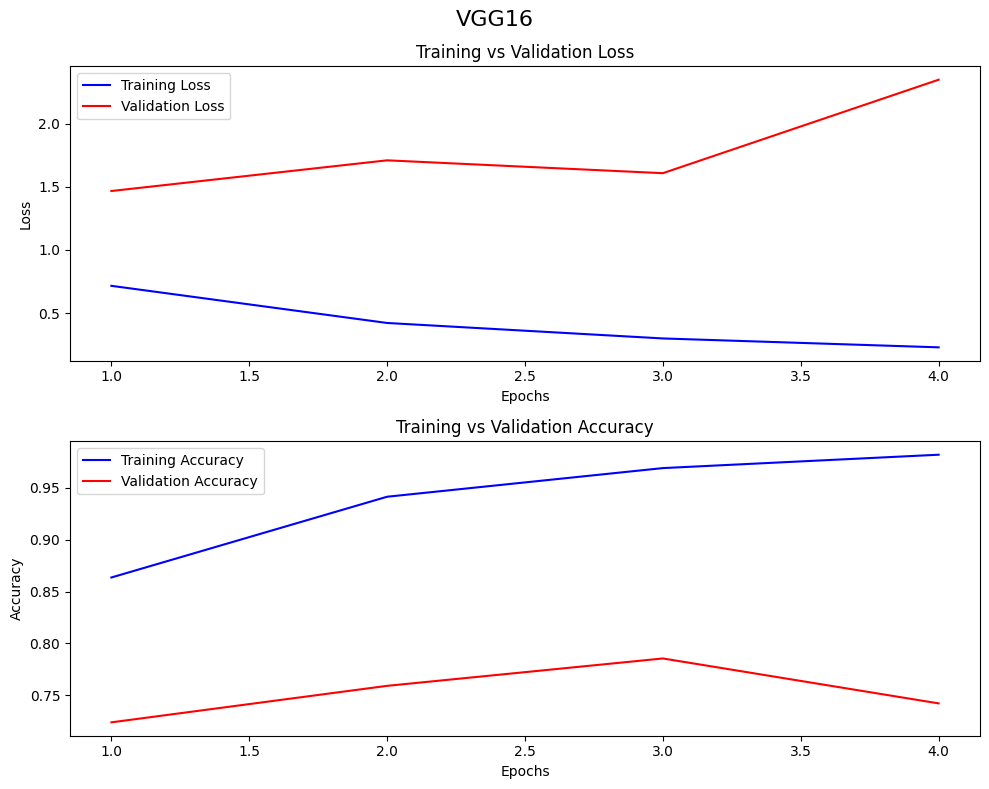

In [15]:
make_graphs(VGG16_hist, "VGG16")

In [6]:
# Xception Model
Xception_base = keras.applications.Xception(
    weights="imagenet",
    include_top=False)
Xception_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

Xception_hist = Xception_Model.fit(train_dataset, epochs=5, validation_data= val_data)

Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.5194 - loss: 1.0765 - val_accuracy: 0.5284 - val_loss: 1.1711
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8706 - loss: 0.1733 - val_accuracy: 0.6604 - val_loss: 1.1404
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.9173 - loss: 0.1339 - val_accuracy: 0.8627 - val_loss: 0.2241
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9591 - loss: 0.0554 - val_accuracy: 0.8931 - val_loss: 0.1505
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9849 - loss: 0.0257 - val_accuracy: 0.8978 - val_loss: 0.1358


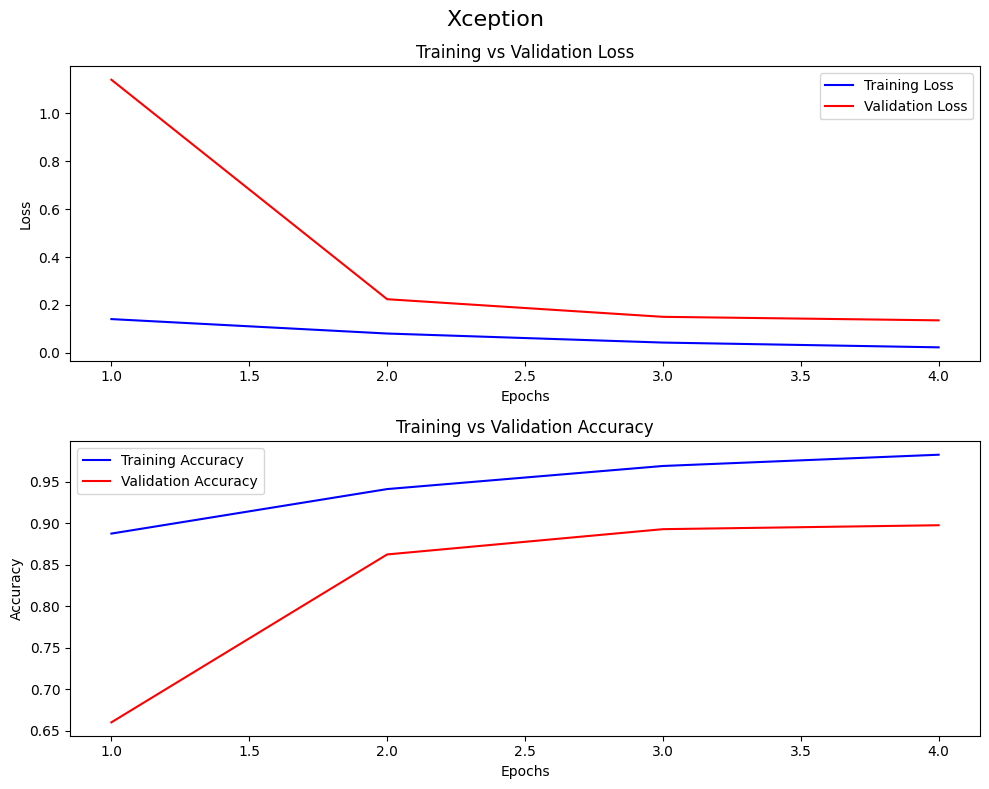

In [16]:
make_graphs(Xception_hist, "Xception")

In [8]:
# ResNet50 Model
ResNet50_base = keras.applications.ResNet50(
    weights="imagenet",
    include_top=False)
ResNet50_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.resnet50.preprocess_input(x)
x = ResNet50_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
outputs = layers.Dense(37, activation="softmax")(x)
ResNet50_Model = keras.Model(inputs, outputs)
ResNet50_Model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

ResNet50_hist = ResNet50_Model.fit(train_dataset, epochs=5, validation_data=val_data)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.3649 - loss: 3.0334 - val_accuracy: 0.7287 - val_loss: 0.6840
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9108 - loss: 0.2823 - val_accuracy: 0.6306 - val_loss: 1.3700
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9647 - loss: 0.1611 - val_accuracy: 0.8207 - val_loss: 0.6593
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9816 - loss: 0.1078 - val_accuracy: 0.8187 - val_loss: 0.7565
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9922 - loss: 0.0565 - val_accuracy: 0.8505 - val_loss: 0.6762


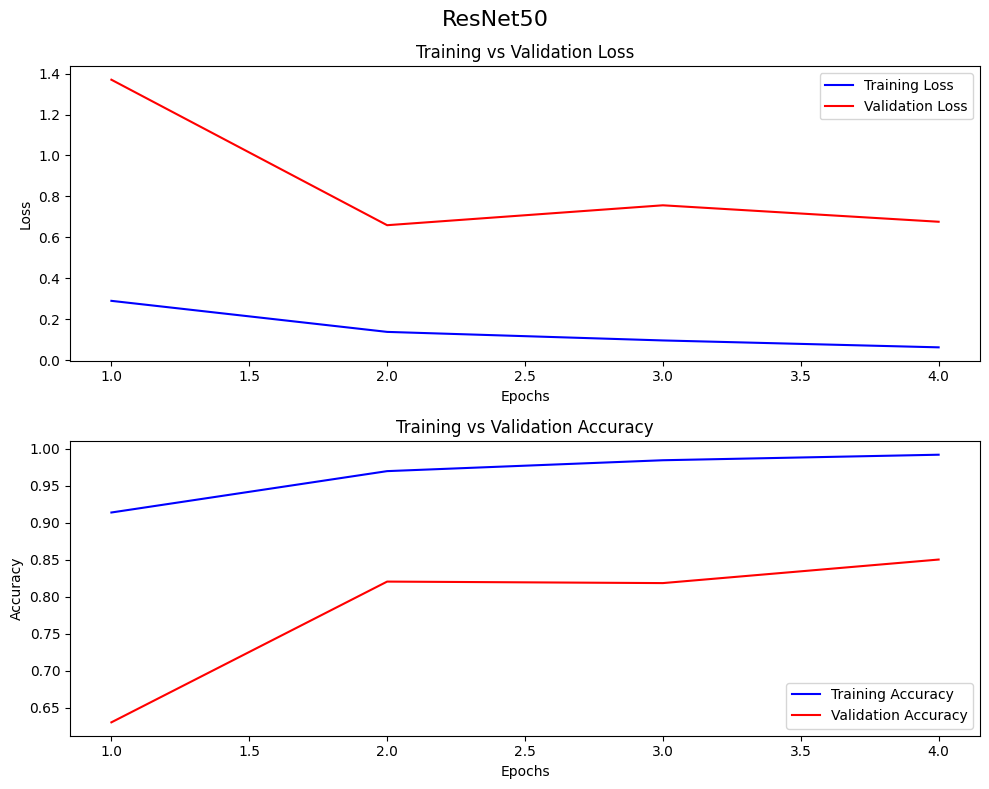

In [17]:
make_graphs(ResNet50_hist, "ResNet50")

In [10]:
# EfficientNetB5 Model
EfficientNetB5_base = keras.applications.EfficientNetB5(
    weights="imagenet",
    include_top=False)
EfficientNetB5_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.efficientnet.preprocess_input(x)
x = EfficientNetB5_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
outputs = layers.Dense(37, activation="softmax")(x)
EfficientNetB5_Model = keras.Model(inputs, outputs)
EfficientNetB5_Model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

EfficientNetB5_hist = EfficientNetB5_Model.fit(train_dataset, epochs=5, validation_data=val_data)

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step
Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 140s 595ms/step - accuracy: 0.5436 - loss: 0.6731 - val_accuracy: 0.6705 - val_loss: 0.6825
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.8798 - loss: 0.1669 - val_accuracy: 0.6664 - val_loss: 0.6593
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.9235 - loss: 0.1034 - val_accuracy: 0.8559 - val_loss: 0.2249
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.9560 - loss: 0.0560 - val_accuracy: 0.8796 - val_loss: 0.1540
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.9760 - loss: 0.0391 - val_accuracy: 0.8809 - val_loss: 0.1465


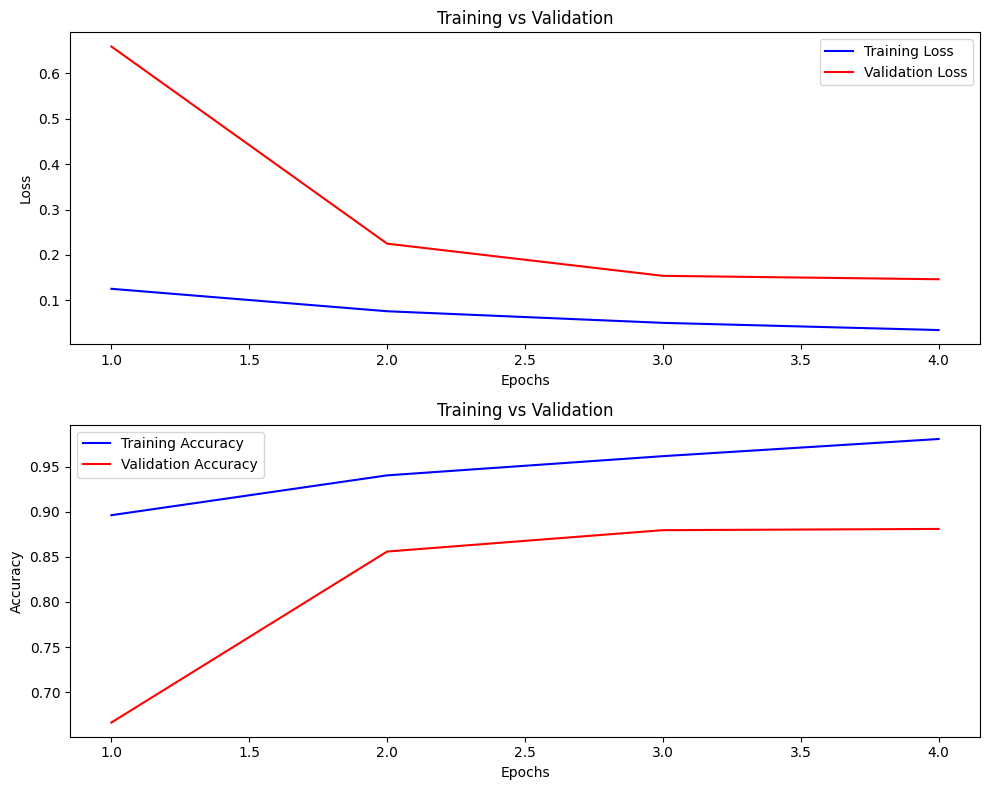

In [11]:
make_graphs(EfficientNetB5_hist, "EfficientNetB5")